# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
#from random import shuffle
from sklearn import metrics
import random
# importing SMOTE
from imblearn.over_sampling import SMOTE
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [12]:
# read the data
df = pd.read_csv('Churn.csv')
# returns the first 5 rows
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# returns the last 5 rows
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Data Overview

In [14]:
# get number of rows and cols of the dataset
dataframe_shape = df.shape
# get number of rows of the dataset
num_rows = dataframe_shape[0]
# get number of cols of the dataset
num_columns = dataframe_shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10000
Number of columns: 14


**Observations:**

- Number of rows: 10000
- Number of columns: 14

In [15]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**

- **Data Completeness:** The dataset consists of 10,000 entries, with each column having complete data (no non-null entries mentioned).
- **Data Types:**
 - Numerical Variables: Columns like RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited, Balance, and EstimatedSalary are either int64 or float64.
 - Categorical Variables: Columns such as Surname, Geography, and Gender are of the object type.
- **Missing Data:** There is no explicit mention of missing data in the provided information.
- **Variety of Variables:** The dataset includes a mix of numerical and categorical data, suggesting a diverse range of information.

In [16]:
# check missing data from the dataset by col wise
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations:**
There is no missing value.

In [17]:
# find the statitical summary for the numerical cols of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Observations:**

**Complete Dataset:** The dataset is comprehensive with 10,000 records for each attribute, indicating an absence of missing values across all columns.

**Customer Identification:**
- **CustomerId:** Exhibits a broad range, reflecting a diverse and extensive customer base with unique identifiers for each customer.

**Creditworthiness:**
- **CreditScore:** Varies significantly between 350 and 850, showcasing a wide spectrum of credit histories among the customers.

**Demographics:**
- **Age:** Spans from 18 to 92 years, indicating a customer base that cuts across various age groups.

**Banking Relationship:**
- **Tenure:** Ranges from 0 to 10 years, signifying a blend of both new and long-standing customers' relationships with the bank.

**Financial Status:**
- **Balance:** Shows substantial variation (0 to approximately 250,898), pointing to considerable differences in the account balances of customers.

**Product Engagement:**
- **NumOfProducts:** With values ranging from 1 to 4, this suggests that customers engage with multiple banking products.

**Credit Card Usage:**
- **HasCrCard:** Indicates that about 71% of customers possess a credit card.

**Customer Engagement:**
- **IsActiveMember:** This binary attribute is almost evenly split, reflecting a mix of actively engaged and less active customers.

**Income Levels:**
- **EstimatedSalary:** Demonstrates extensive variability (from 11.58 to 199,992.48), suggesting a customer base with diverse income levels.

**Customer Retention:**
- **Exited:** With values of 0 or 1, the data reveals a customer churn rate of approximately 20%, a significant indicator for assessing customer retention strategies and overall satisfaction.

In [18]:
df.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Observations:**

**Surname Diversity:**
The dataset includes a wide range of surnames, totaling 2,932 unique entries.
The surname "Smith" is the most frequent, occurring 32 times, which might indicate a commonality but does not dominate the dataset, suggesting a diverse customer base in terms of family names.

**Geographic Distribution:**
There are three distinct geographical locations represented in the dataset.
A significant portion of the dataset (over half) is from "France," making it the most common geographical area among the customers. This could imply a regional focus or a larger market share in France.

**Gender Representation:**
The dataset shows a near-even split in gender distribution with only two genders represented.
Males are slightly more prevalent, making up 5,457 out of the 10,000 entries. This small disparity suggests a relatively balanced representation of genders in the customer base.

In [19]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


**Observations:**

**Geographic Representation:**
The dataset shows a strong presence in three countries: France, Germany, and Spain.
A majority of the customers are from France (5,014), indicating a major market share there, followed by Germany (2,509) and Spain (2,477).
This geographic spread can provide insights into market preferences and regional banking behaviors.

**Gender Distribution:**
The gender split shows a majority of male customers (5,457) compared to female customers (4,543), indicating a slightly male-skewed customer base.
Despite the skew, the gender distribution is relatively balanced, which could be relevant for gender-specific marketing strategies or product offerings.

These observations give an in-depth view of the customer base's demographic and geographic characteristics, crucial for targeted marketing initiatives, product development, and understanding the bank's market position across different regions.

In [20]:
# RowNumber , CustomerId and Surname are unique hence drop them
ds = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

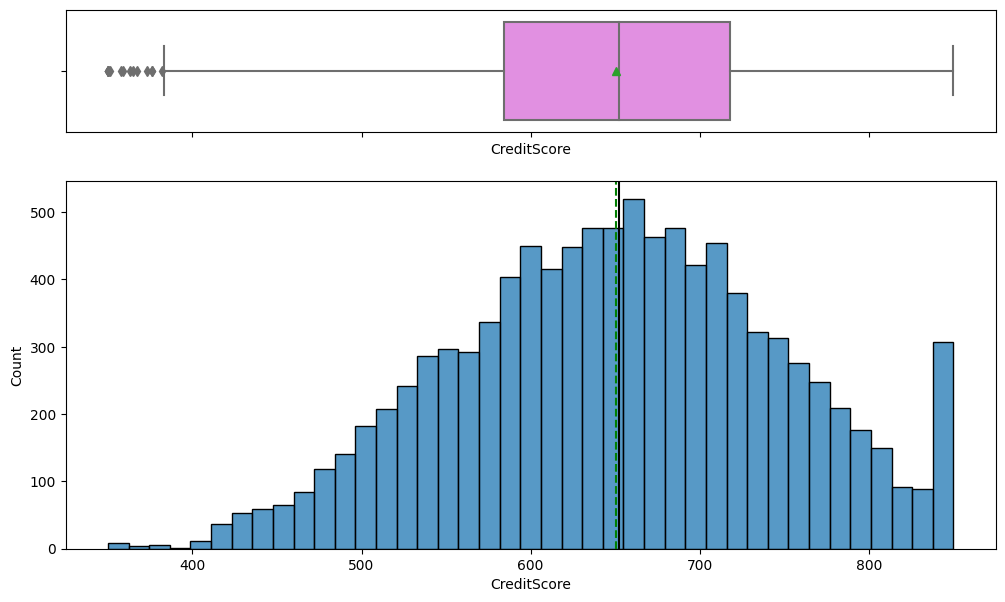

In [ ]:
histogram_boxplot(ds,'CreditScore')

**Observations:**

**Boxplot:**
- The boxplot shows the median CreditScore around the mid-600s, which is the line inside the box.
- The interquartile range (IQR) spans from approximately the low 600s to the high 600s, indicating the middle 50% of the data.
- There are a few outliers on the lower end, as indicated by the individual points outside the whiskers.

**Histogram:**
- The histogram below the boxplot displays the distribution of CreditScore across the dataset.
- The distribution looks approximately normal but seems to be slightly left-skewed.
- The peak of the histogram is also around the mid-600s, consistent with the median in the boxplot.
- There's an unusual spike in the histogram for the highest bin, which could be indicative of an anomaly in the data or a binning artifact.

#### Observations on Age

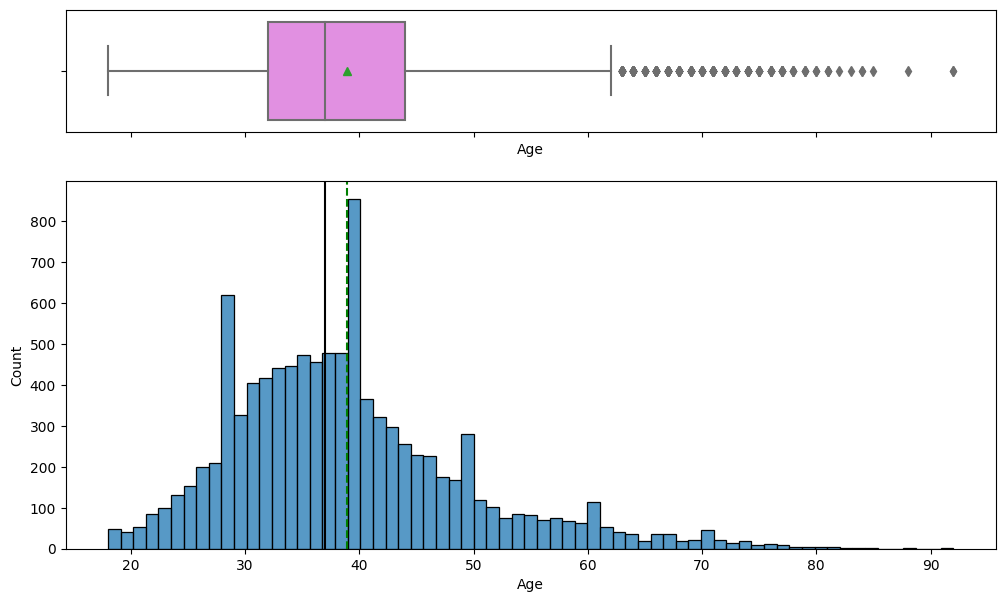

In [ ]:
histogram_boxplot(ds,'Age')

**Observations:**

**Boxplot:**
- The median age is represented by the line within the box, which appears to be around the late 30s.
- The interquartile range (IQR) is quite broad, suggesting a wide spread of ages in the middle 50% of the data.
- There are numerous outliers on the upper end, as indicated by the points beyond the upper whisker.

**Histogram:**
- The histogram displays the frequency distribution of ages.
- The distribution is right-skewed, with a higher concentration of customers in the younger age brackets.
- The peak of the histogram appears to be in the 30-40 age range.
- There is a long tail towards the older age groups, which corresponds to the outliers observed in the boxplot.

#### Observations on Balance

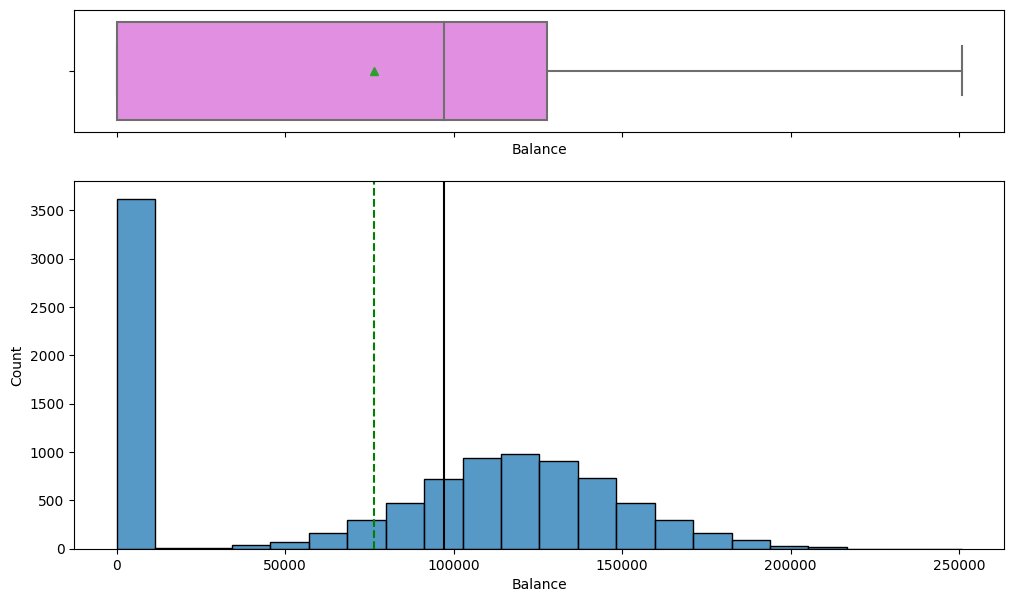

In [ ]:
histogram_boxplot(ds,'Balance')

**Observations:**

**Boxplot:**
- The boxplot indicates that the median balance is around the mid-range of the data.
- The interquartile range is relatively narrow, indicating that the middle 50% of balance values are not spread out over a wide range.
- There do not appear to be any outliers, and the distribution is skewed towards the lower end, with the median closer to the third quartile.

**Histogram:**
- The histogram shows a large number of counts at a balance of zero, which could indicate a significant number of customers with no balance or a closed account.
- The distribution of balances is right-skewed, with the majority of customers having lower balances and fewer customers having higher balances.
- There is a gradual decline in frequency as the balance amount increases, with very few customers having very high balances.


#### Observations on Estimated Salary

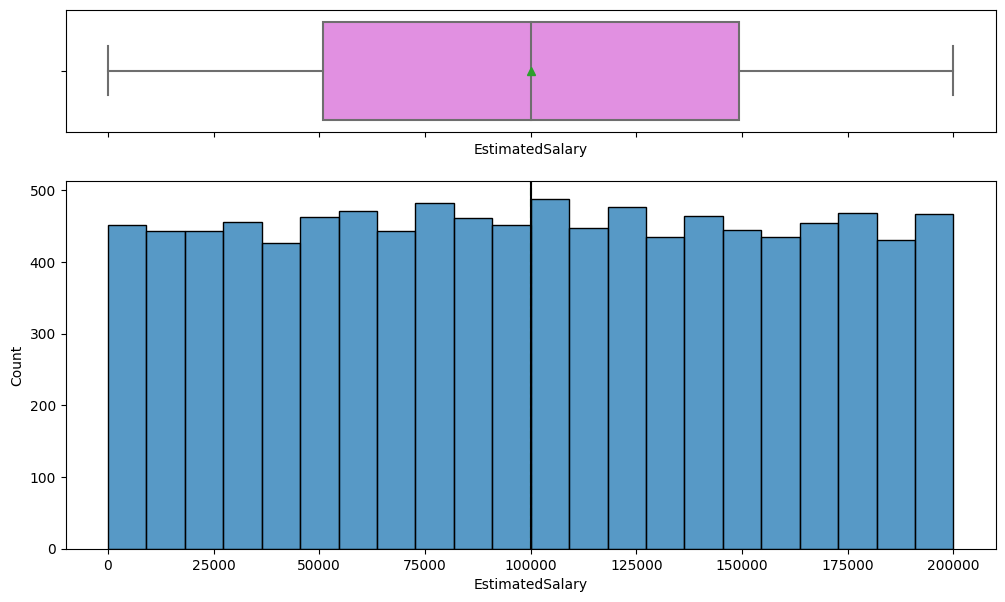

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

**Observations:**

**Boxplot:**
- The median EstimatedSalary is around the mid-point of the salary range, as shown by the line in the middle of the box.
- The interquartile range (the box) spans almost the entire range of the data, suggesting a uniform distribution across the quartiles.
- There are no visible outliers, indicating that all salary estimates fall within a typical range without any extreme values.

**Histogram:**
- The histogram shows a nearly uniform distribution of EstimatedSalary across the different bins.
- There is no clear skewness in the data, with the count of customers being relatively even across the entire salary range.
- This uniformity is somewhat unusual for salary data, which typically exhibits a right skew; it might suggest that the EstimatedSalary figures have been evenly binned or distributed within this dataset.

#### Observations on Exited

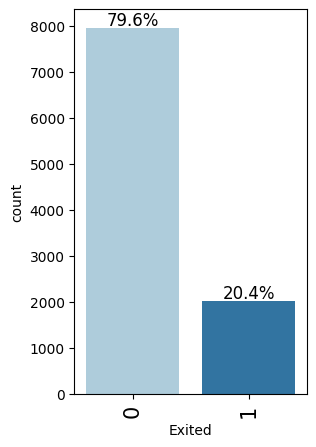

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

**Observations:**

- The majority of customers, 79.6%, are represented by the value '0', which likely indicates that they have not exited (they are retained customers).
- A smaller portion of customers, 20.4%, are represented by the value '1', which likely indicates that they have exited (they are churned customers).

This visualization highlights the churn rate within the dataset and shows that about one-fifth of the customers have churned, while the remaining majority are retained. Understanding the factors that contribute to customer exit can be important for developing retention strategies.

#### Observations on Geography

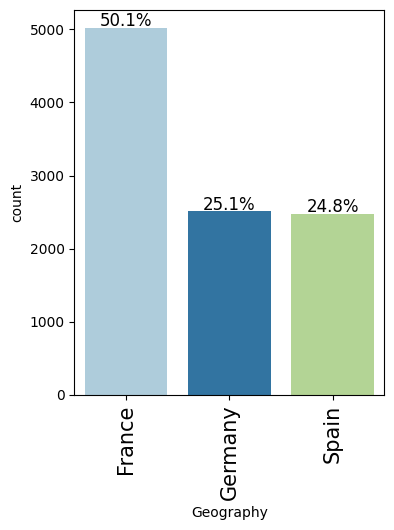

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

**Observations:**

**France:** Represents the largest segment of customers, accounting for just over half of the total at 50.1%.

**Germany:** Constitutes about a quarter of the customers at 25.1%.

**Spain:** Is close to Germany in customer distribution, with 24.8% of the customers.

This bar chart indicates that France has the highest concentration of customers in this dataset, while Germany and Spain have a fairly similar and smaller share of customers. This information can be useful for regional market analysis and strategic planning.

#### Observations on Gender

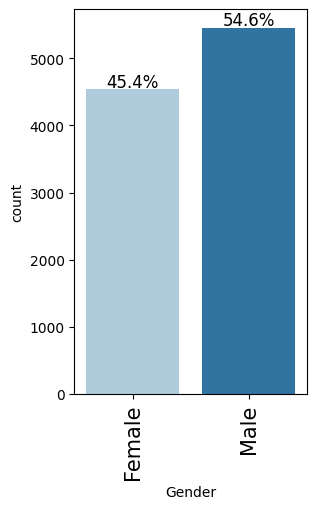

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

**Observations:**

**Female:** Represents 45.4% of the total count.

**Male:** Slightly more represented at 54.6% of the total count.

The chart indicates that males are a larger proportion of the customer base than females, with both groups having a substantial representation. This kind of information is useful for analyzing customer demographics and tailoring marketing strategies or product offerings to different gender segments.

#### Observations on Tenure

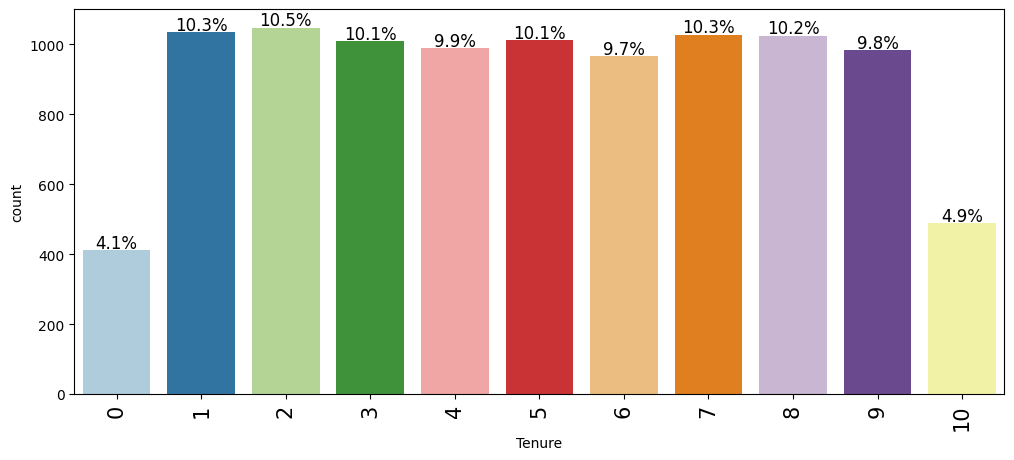

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

**Observations:**

- Tenures of 1 to 9 years have a relatively even distribution, each accounting for roughly 9.7% to 10.5% of the customer base.
- Tenures at the extreme ends (0 and 10 years) are less common, with notably fewer customers at these points.

This distribution could suggest that customers are equally likely to have been with the bank for any number of years between 1 to 9, with drop-offs in the first and after the tenth year. This pattern might be of interest when analyzing customer loyalty and retention strategies.

#### Observations on Number of Products

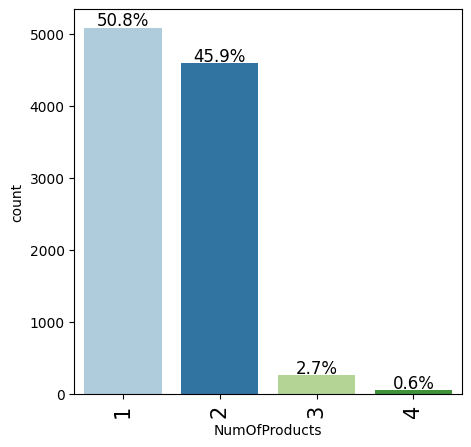

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

**Observations:**

- The majority of customers have one or two products, with these categories accounting for almost the entirety of the customer base.
- A very small percentage of customers have three or four products, indicating that few customers opt for or are offered a broader range of products.

This distribution could suggest that there may be a standard set of one or two products that most customers hold, while additional products are less common. This pattern might be significant for analyzing product cross-selling strategies and customer engagement.

#### Observations on Has Credit Card

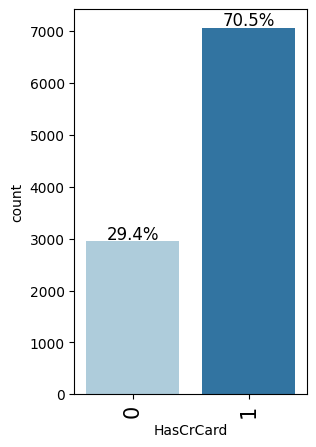

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

**Observations:**

**Does Not Have Credit Card:** Represents 29.4% of the customers.

**Has Credit Card:** Represents a significant majority with 70.5% of the customers.

This chart suggests that a substantial portion of the customer base possesses a credit card, which could indicate a potential for credit card-related marketing strategies or cross-selling credit products.

####Observations on Is Active Member

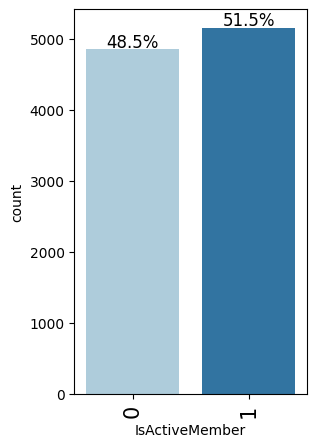

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

**Observations:**

**Not Active Member:** Comprises 48.5% of the customers.

**Active Member:** Slightly more than half of the customers are active, accounting for 51.5%.

The distribution is almost evenly split between active and inactive members, suggesting that the customer base has a balanced engagement level with the bank or service. This could be useful information when considering engagement strategies or loyalty programs to increase activity rates.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

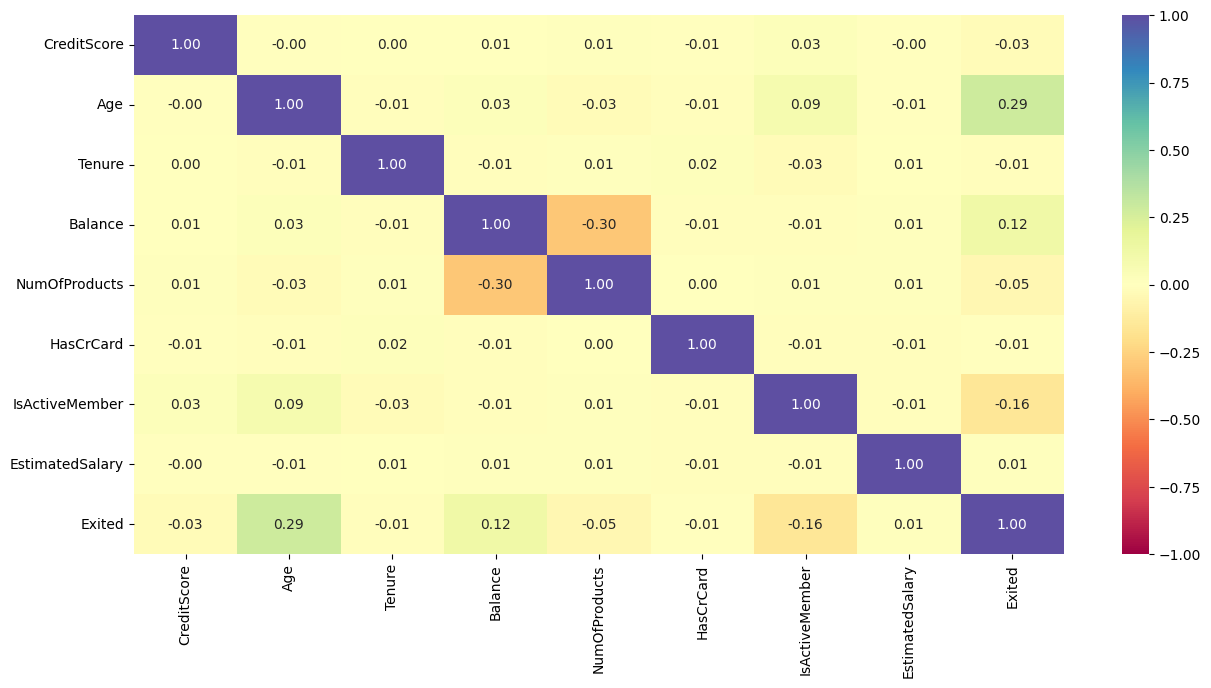

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


**Observations:**

**Balance and NumOfProducts:**
There is a moderately negative correlation of -0.30, suggesting that customers with higher balances tend to have fewer products with the bank.

**Age and Exited:**
A positive correlation of 0.29 indicates that older customers are more likely to have exited.

**IsActiveMember and Exited:**
There is a negative correlation of -0.16, suggesting that active members are less likely to exit.

Other correlations are relatively weak, close to 0, indicating no strong linear relationship between those pairs of features.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


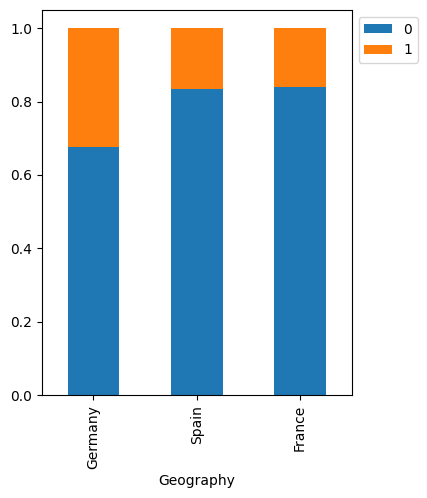

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

**Observations:**

**Overall Churn:**
Out of a total of 10,000 customers, 2,037 have exited, representing a churn rate of approximately 20.37%.

**Churn by Geography:**
Germany has a significantly higher churn rate (32.4%) compared to the other regions.
France has the largest number of customers but a lower churn rate (16.2%).
Spain also has a lower churn rate (16.7%) and is similar to France in terms of customer retention.

**Customer Distribution:**
France represents the largest customer base with 5,014 customers.
Germany and Spain have smaller customer bases, with 2,509 and 2,477 customers, respectively.

The stacked bar chart visually emphasizes that while France has the most customers, the churn rate is relatively low. In contrast, Germany, despite having fewer customers, has a higher churn rate, which might indicate underlying regional market differences or customer satisfaction issues that could be addressed through targeted retention strategies.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


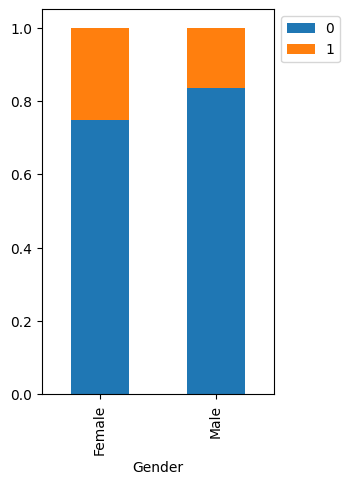

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )

**Observations:**

- **Gender Distribution:**
The dataset consists of 4,543 female and 5,457 male customers.

- **Churn Rate:**
 - Female customers have a higher churn rate of approximately 25.07%, with 1,139 out of 4,543 exiting.
 - Male customers have a lower churn rate of approximately 16.46%, with 898 out of 5,457 exiting.

- **Overall Churn:**
Out of the total customer base of 10,000, there is an overall churn rate of 20.37%.

The stacked bar chart visually represents these figures, showing a clear gender disparity in churn rates, with female customers being more likely to leave than male customers. This suggests potential areas for further investigation into service satisfaction or product offerings by gender, and it may inform targeted retention strategies.







#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


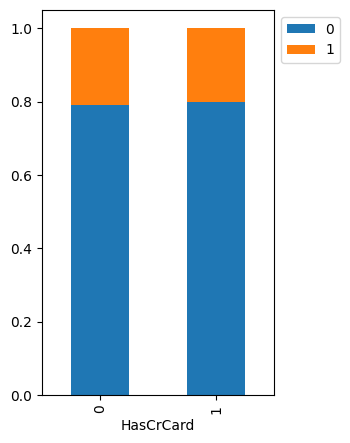

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )

**Observations:**

**Credit Card Ownership:**
- A majority of the customer base, 7,055 individuals, own a credit card.
- A smaller segment of the customer base, 2,945 individuals, does not own a credit card.

**Churn Rates:**
- Customers with a credit card have a churn rate of approximately 20.18%, with 1,424 out of 7,055 having exited.
- Customers without a credit card have a slightly higher churn rate of approximately 20.81%, with 613 out of 2,945 having exited.

**Overall Churn:**
- Out of 10,000 customers, 2,037 have exited, resulting in an overall churn rate of 20.37%.

The chart indicates that credit card ownership has a minimal impact on churn rates, as both groups have similar churn rates. The data suggests that other factors may be more influential in predicting churn. This information could be important for understanding the factors that contribute to customer retention and developing targeted strategies for customer engagement and loyalty.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


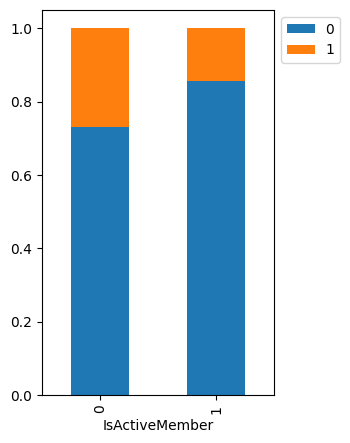

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

**Observations:**

**Active Membership Influence:**
- Customers who are active members have a lower churn rate (14.26%) compared to inactive members (26.84%).

**Membership Distribution:**
- The dataset contains a slightly larger number of inactive members (4,849) compared to active members (5,151).

**Churn Distribution:**
- Among inactive members, a significantly higher proportion (1,302 out of 4,849) have exited.
- Among active members, a smaller proportion (735 out of 5,151) have exited.

**Overall Churn Rate:**
- The overall churn rate across all customers is 20.37%.

The visual representation on the chart clearly shows that being an active member is associated with a higher likelihood of staying with the service or bank. This suggests that customer engagement and activity are key areas to focus on for reducing churn and improving customer retention.

#### Exited Vs Credit Score

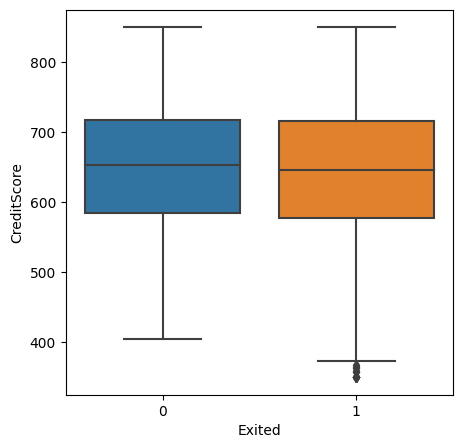

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

**Observations:**

- The overall distribution of Credit Scores between customers who exited and those who did not is quite similar, with no significant differences observable from the box plot's main components (median and IQR).

- The visual data implies that Credit Score alone may not be a strong indicator of whether a customer is likely to exit. It might be necessary to look at other factors in conjunction with Credit Score to better understand customer churn.

#### Exited Vs Age

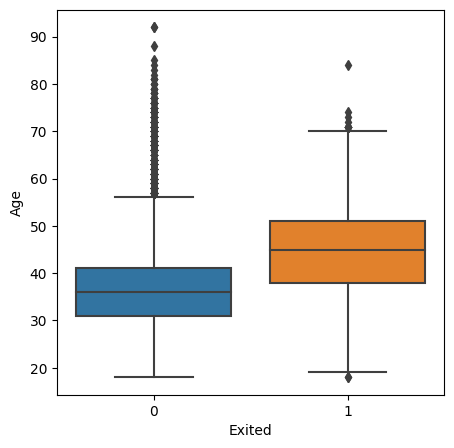

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

**Observations:**

**Age Distribution for Retained Customers:**
- The median age is situated in the late 30s, suggesting that the middle-aged group is more likely to stay.
- The interquartile range (IQR) is relatively narrow, indicating that most retained customers are within a similar age range.
- There are several outliers, which represent retained customers who are significantly older than the average.

**Age Distribution for Exited Customers:**
- The median age is in the early 40s, indicating that on average, customers who exited are older than those who stayed.
- The IQR is broader for exited customers, suggesting a wider variation in age among this group.
- Outliers are present here as well, but there are notably fewer compared to the retained group.

**Overall Comparison:**
- The age of customers who exited tends to be higher than those who did not.
- The age range (as depicted by the whiskers) is more compact for exited customers, indicating that very young and very old customers are less likely to exit.

These observations suggest that age may be a factor in customer retention, with older customers showing a higher propensity to exit. This could be a point of focus for analyzing customer satisfaction and retention strategies across different age demographics.

#### Exited Vs Tenure

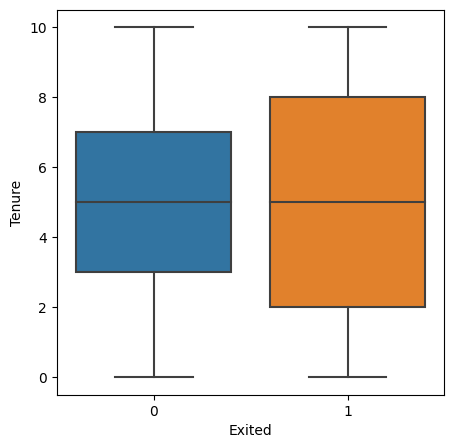

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

**Observations:**

- The distribution of tenure is quite similar between customers who have stayed and those who have exited, with no significant differences in the central tendency or spread of the tenure.

- These observations indicate that tenure alone may not be a strong predictor of customer churn, as both groups display a similar pattern in tenure distribution. Other factors might need to be considered to understand why customers choose to exit.

#### Exited Vs Balance

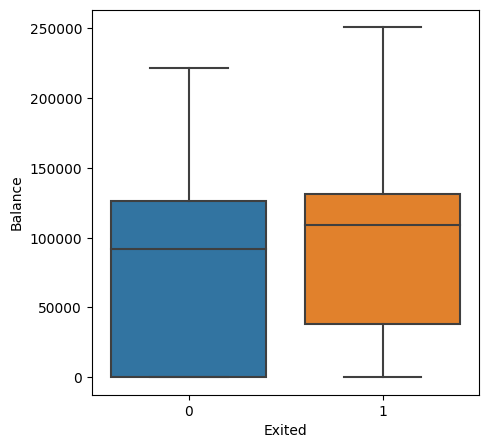

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

**Observations:**

**Median Balance:** Both retained and exited customers have a median balance around the same level, which appears to be approximately 100,000 currency units.

**Spread of Balances:**
- Retained customers show a consistent spread from the lower quartile to the upper quartile, with a lower range that starts near 0, suggesting that a number of these customers have low or no balance.
- Exited customers have a broader interquartile range (IQR), indicating greater variation in the balances within this group. Notably, the lower quartile for exited customers is above 0, suggesting that customers who leave generally have some balance in their accounts.

**Range of Balances:**
- The total range of balances for both groups extends to the upper limit of the data. However, for exited customers, the range does not go as low as it does for retained customers, reinforcing the observation that exited customers are less likely to have very low balances.

**Upper Extremes:**
- Both groups show potential outliers on the higher end of the balance spectrum, with individual points above the upper whisker.

These observations suggest that having a certain level of balance does not strongly influence whether customers will stay or leave. However, the lack of very low balances among exited customers could indicate that customers with some financial investment are more likely to consider leaving the service or institution. This information might be valuable for identifying at-risk customers and improving retention strategies.

#### Exited Vs Number of Products

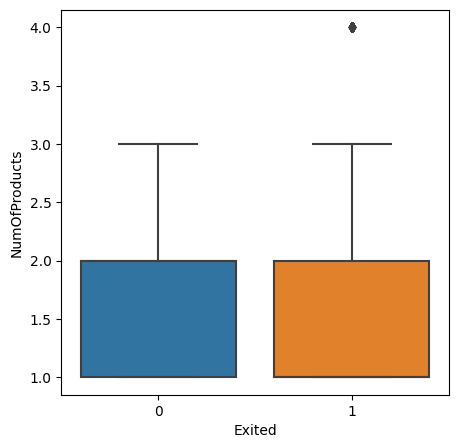

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

**Observations:**

The box plot suggests that the number of products is not a distinguishing factor between customers who stayed and those who exited, as both groups show similar medians and spreads.

#### Exited Vs Estimated Salary

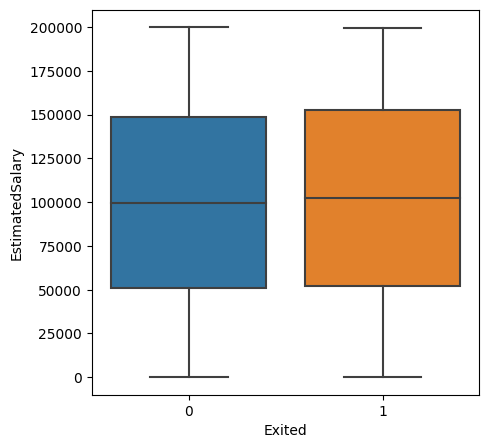

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

**Observations:**

- Median estimated salary is similar for both groups, around 100,000.
- Salary distribution is consistent between retained and exited customers.
- Salary does not appear to be a significant factor in customer churn.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [21]:
# Separate independent and dependent variable
# Excluding the CreditScore,NumOfProducts columns as they have minimal impact on the 'Exited' variable.
X = ds.drop(["CreditScore","NumOfProducts","Exited"], axis=1)
Y = ds[["Exited"]]

In [22]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify=Y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [23]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [24]:
ds.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Create dummy variables for string type variables**

In [25]:
# Encoding Geography, Gender variable
X_train = pd.get_dummies(X_train, columns=["Geography", "Gender"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography", "Gender"], drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography", "Gender"], drop_first=True)

**Normalize the numerical data**

In [26]:
sc = StandardScaler()
# Fit the scaler to the train set
temp = sc.fit(X_train[["Age", "Tenure", "Balance","EstimatedSalary"]])
# Transform the train set
X_train[["Age", "Tenure", "Balance","EstimatedSalary"]] = temp.transform(X_train[["Age", "Tenure", "Balance","EstimatedSalary"]])
# Transform the test set
X_test[["Age", "Tenure", "Balance","EstimatedSalary"]] = temp.transform(X_test[["Age", "Tenure", "Balance","EstimatedSalary"]])
# Transform the validation set
X_val[["Age", "Tenure", "Balance","EstimatedSalary"]] = temp.transform(X_val[["Age", "Tenure", "Balance","EstimatedSalary"]])


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**

In [27]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [98]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
print(X_val.shape)  # Check the shape of X_val

(1600, 9)


In [30]:
print(X_train.shape)  # Check the shape of X_train

(6400, 9)


In [31]:
print(X_test.shape)  # Check the shape of X_train

(2000, 9)


In [99]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform', input_dim=9))

# Adding the first hidden layer
classifier.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))

# Adding the 2nd hidden layer
classifier.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))


In [100]:
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,809
Trainable params: 3,809
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = classifier.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                         epochs=100,
                         batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4938 - accuracy: 0.7764 - val_loss: 0.4659 - val_accuracy: 0.7925
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7916 - val_loss: 0.4541 - val_accuracy: 0.7900
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7975 - val_loss: 0.4473 - val_accuracy: 0.8000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8073 - val_loss: 0.4434 - val_accuracy: 0.8037
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8127 - val_loss: 0.4417 - val_accuracy: 0.8050
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8134 - val_loss: 0.4389 - val_accuracy: 0.8144
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8164 - val_loss: 0.4369 - val_accuracy: 0.8181

**Loss function**

63/63 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8285


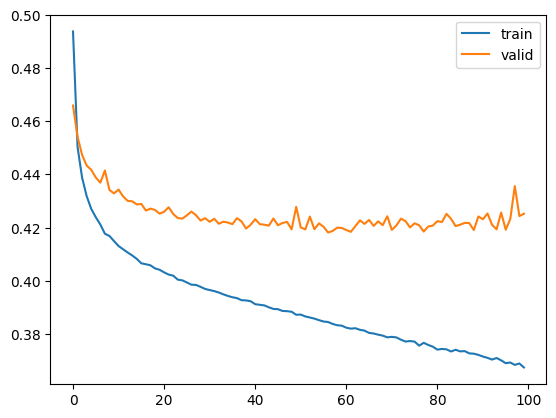

In [103]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

In [105]:
#Predicting the results using best as a threshold
y_pred_e=classifier.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [106]:
cr = metrics.classification_report(y_val, y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1274
           1       0.43      0.58      0.49       326

    accuracy                           0.76      1600
   macro avg       0.65      0.69      0.67      1600
weighted avg       0.79      0.76      0.77      1600



**Confusion matrix**

50/50 [==============================] - 0s 2ms/step


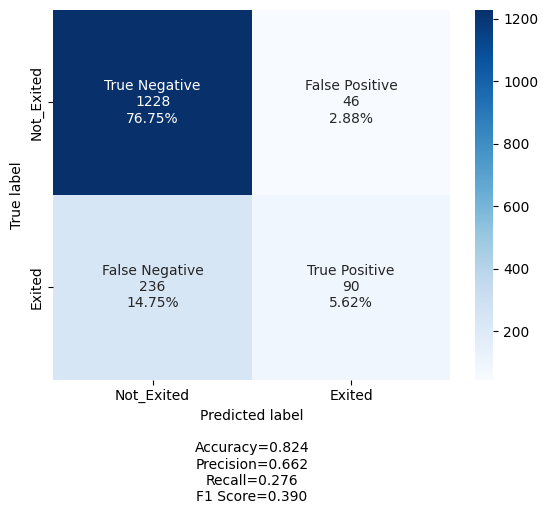

In [37]:
y_pred1 = classifier.predict(X_val)

# Applying the default threshold of 0.5
y_pred1 = (y_pred1 > 0.5)

# Generating the confusion matrix
cm2 = confusion_matrix(y_val, y_pred1)

# Assuming make_confusion_matrix is a predefined function to create a confusion matrix plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap='Blues')

**Observations:**

* **High True Negative Rate:** A large majority of the non-exited customers were correctly identified (76.75%), showing the model's strength in predicting the negative class.

* **Low False Positive Rate:** A relatively small proportion of customers were incorrectly predicted to exit (2.88%), indicating that the model is conservative in predicting exits.

* **High False Negative Rate:** A significant number of exited customers were incorrectly classified as not exited (14.75%). This suggests that the model is missing a substantial number of positive cases.

* **Moderate True Positive Rate:** Only a small percentage of actual exits were correctly predicted (5.62%), which is concerning for a model tasked with identifying customers likely to churn.

* **Overall Accuracy:** The model is correct approximately 82.4% of the time across both classes. While this may seem high, it is skewed by the model's ability to predict the more common negative class.

* **Precision:** The precision of 0.662 means that out of all customers the model predicted would exit. This is a fairly good precision rate but can be improved.

* **Recall:** The recall (sensitivity) of 0.276 is quite low, indicating that the model failed to identify a large number of customers who exited.

* **F1 Score:** The F1 score of 0.39 is a moderate score and is closer to the recall due to its low value. It suggests that the model's precision and recall are not well balanced.

These observations suggest that while the model performs well in identifying customers who will not exit, it needs improvement in correctly identifying customers who will exit. The low recall and F1 score are of particular concern as they imply the model is not as effective at catching all true positive cases, which is often critical in a business context where identifying customers at risk of churning is a priority. Additional model tuning, feature engineering, or even gathering more data could potentially improve these metrics.

### Model Building: Neural Network model with Adam Optimizer

In [38]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [49]:
def create_model():
    # Initializing the neural network
    model = Sequential()

    # Adding the input layer with 64 neurons and relu as activation function
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform'))

    # Adding the first hidden layer
    model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))

    # Adding the output layer with Sigmoid Activation
    model.add(Dense(1, activation='sigmoid'))

    # Initializing the optimizer with Adam Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # Compiling the model with binary cross entropy as loss function and accuracy as metrics
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [50]:
model=create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                640       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7867 - val_loss: 0.4405 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8228 - val_loss: 0.4301 - val_accuracy: 0.8188
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8273 - val_loss: 0.4281 - val_accuracy: 0.8294
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8303 - val_loss: 0.4311 - val_accuracy: 0.8219
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8283 - val_loss: 0.4269 - val_accuracy: 0.8181
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8334 - val_loss: 0.4217 - val_accuracy: 0.8306
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8320 - val_loss: 0.4204 - val_accuracy: 0.8288

**Loss function**

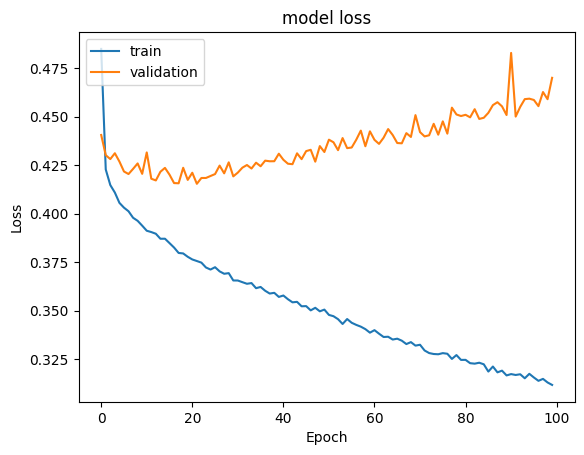

In [52]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [53]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Calling the create_model() function to initialize the model
model_e = create_model()

# Training the model on X_train and y_train for 100 epochs and also using X_val and y_val as validation_data
history_e = model_e.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.7948 - val_loss: 0.4321 - val_accuracy: 0.8138
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8220 - val_loss: 0.4251 - val_accuracy: 0.8231
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8269 - val_loss: 0.4222 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8286 - val_loss: 0.4259 - val_accuracy: 0.8288
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8309 - val_loss: 0.4239 - val_accuracy: 0.8269
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8339 - val_loss: 0.4171 - val_accuracy: 0.8350
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8328 - val_loss: 0.4184 - val_accuracy: 0.8344

**Loss function**

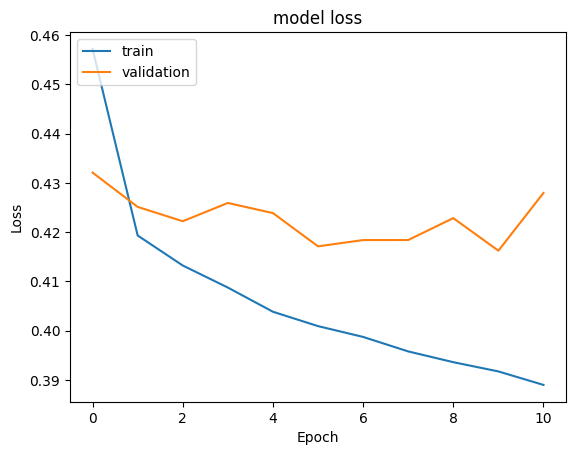

In [54]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.249072, G-Mean=0.734


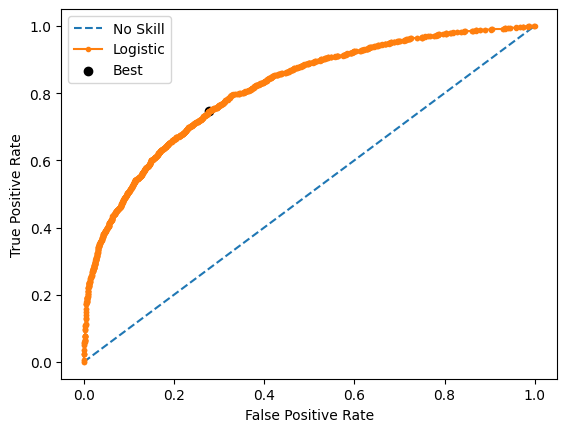

In [55]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [56]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 947us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [57]:
cr = metrics.classification_report(y_val, y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1274
           1       0.37      0.69      0.48       326

    accuracy                           0.70      1600
   macro avg       0.63      0.69      0.63      1600
weighted avg       0.79      0.70      0.72      1600



**Observations:**

* For customers who did not exit:
 * The model is quite precise (90%) in predicting customers who stay, but it misses some actual non-exits (recall of 70%), which is reflected in the F1-score of 0.79.

* For customers who exited:
 * The model has a lower precision (37%), indicating a relatively high number of false positives (customers predicted to exit but didn't).
 * The recall is higher (69%), suggesting the model is better at identifying most of the actual exits but at the cost of incorrectly predicting some non-exits as exits.
 * The F1-score for this class is moderate at 0.48, reflecting a compromise between the high recall and low precision.

* The overall accuracy of the model is 70%, which means that out of all predictions, 71% were correct.

* The macro average scores show that the model has decent average performance across both classes (precision of 63%, recall of 69%, and F1-score of 63%).

* The weighted average scores are higher (precision of 79% and F1-score of 72%), which takes into account the number of samples in each class and indicates better performance on the majority class.

These observations indicate that while the model is generally good at identifying customers who will not exit, it struggles to accurately distinguish between those who will exit and those who will not, as indicated by the lower precision for class 1. This could lead to inefficient use of resources if the model's predictions are used for targeted retention campaigns. There is a clear need for improving the precision for class 1 while maintaining or improving the recall, which may require further model tuning, better feature engineering, or even gathering more relevant data. Additionally, addressing the class imbalance could help improve the model's ability to predict the minority class.

**Confusion matrix**

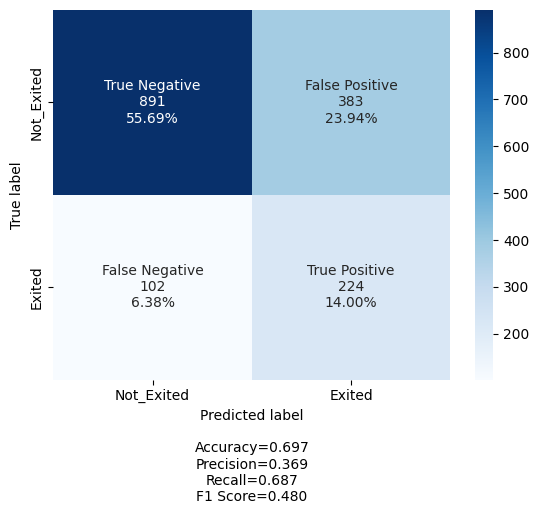

In [58]:
cm1 = confusion_matrix(y_val, y_pred_e)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations:**

* **True Negatives:** The model predicted 'Not Exited' correctly for 891 cases.

* **False Positives:** There were 383 instances where customers were incorrectly identified as 'Exited'.

* **False Negatives:** The model missed 102 cases where customers actually 'Exited'.

* **True Positives:** Correctly predicted 'Exited' for 224 cases.

* **Accuracy:** At 0.697, the model is correct in its predictions.

* **Precision:** The precision of 0.369 indicates that when the model predicts an 'Exited' case, it is correct approximately 39.7% of the time. This is relatively low, meaning there are quite a few false positives.

* **Recall:** A recall of 0.687 suggests that the model is able to identify of the actual 'Exited' cases, missing out on around 31.3%.

* **F1 Score:** An F1 score of 0.48 is an indicator of the model's balance between precision and recall, but it also indicates that there's considerable room for improvement.

Overall, these observations show a model that can reasonably identify 'Exited' customers but struggles with a significant number of false positives. The recall is better than precision, which may be appropriate if the cost of missing an 'Exited' customer (a false negative) is higher than incorrectly predicting a customer will exit (a false positive). However, the low precision could lead to unnecessary retention efforts and associated costs.

Improving the model could involve strategies like adjusting the decision threshold, collecting more representative training data, feature selection and engineering, or exploring more complex models to improve both precision and recall, depending on the business impact of false positives versus false negatives.

### Model Improvement: Neural Network model with Dropout

In [59]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [60]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform'))

# Adding dropout with dropout_rate=0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

# Adding dropout with dropout_rate=0.1
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

# Adding the output layer
model_3.add(Dense(1, activation='sigmoid'))


In [61]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable pa

In [62]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [63]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.7917 - val_loss: 0.4529 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7983 - val_loss: 0.4410 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7995 - val_loss: 0.4396 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7986 - val_loss: 0.4368 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8077 - val_loss: 0.4322 - val_accuracy: 0.8075
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8064 - val_loss: 0.4295 - val_accuracy: 0.8156
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8105 - val_loss: 0.4288 - val_accuracy: 0.8188

**Loss function**

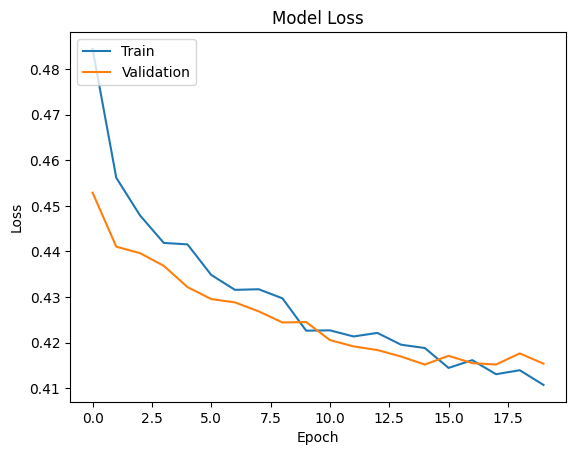

In [64]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.230609, G-Mean=0.734


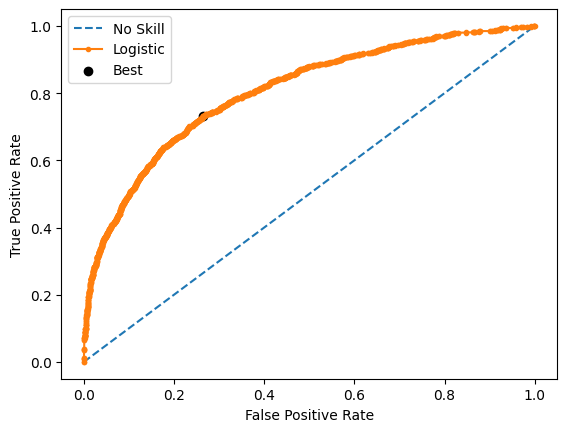

In [65]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [66]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 951us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [67]:
cr = metrics.classification_report(y_val, y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1274
           1       0.40      0.70      0.51       326

    accuracy                           0.72      1600
   macro avg       0.65      0.71      0.66      1600
weighted avg       0.80      0.72      0.75      1600



**Observations:**

* High precision for non-exiting customers at 90%.
* Lower recall for non-exiting customers, with 73% identified.
* F1-score for non-exit predictions is strong at 0.81.
* Lower precision for predicting exits at 40%, indicating many false positives.
* Higher recall for exits at 70%, showing most actual exits are captured.
* Moderate F1-score for exit predictions at 0.51.
* Overall accuracy of the model is 72%.
* Macro average precision and recall are 65% and 71%, indicating moderate performance.
* Weighted average precision is 80%, skewed by performance on the majority class.
* Weighted average F1-score is 75%.
* Improvement needed to reduce false positives and better balance precision and recall for the exited class.

**Confusion report**

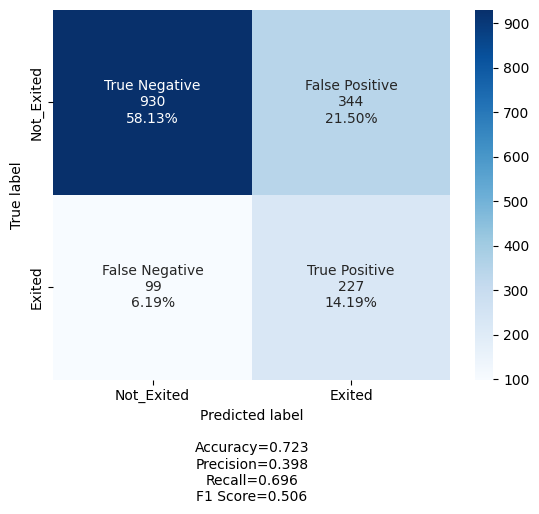

In [68]:
cm1 = confusion_matrix(y_val, y_pred_3)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations:**

* **True Negative:** 930 predictions correctly identified as not exited (58.13%).
* **False Positive:** 344 predictions incorrectly identified as exited (21.50%).
* **False Negative:** 99 predictions incorrectly identified as not exited (6.19%).
* **True Positive:** 227 predictions correctly identified as exited (14.19%).

Performance Metrics:

* **Accuracy:** 72.3%, indicating the proportion of total correct predictions.
* **Precision:** 39.8%, indicating the proportion of positive identifications that were actually correct.
* **Recall:** 69.6%, indicating the proportion of actual positives that were identified correctly.
* **F1 Score:** 50.6%, a measure of the test's accuracy, considering both precision and recall.

The model shows relatively high accuracy but is biased towards predicting non-exits, with a high false positive rate and moderate recall, suggesting it can identify exits reasonably well but often at the expense of incorrectly predicting exits for non-exiting customers. The F1 score suggests room for improvement in achieving a balance between precision and recall.

### Model Improvement: Neural Network model with Hyperparameter tuning

In [70]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [71]:
def create_model_v2(dropout_rate=0.1, lr=0.001, layer_1=64, layer_2=32):
    np.random.seed(1337)

    # Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform'))

    # Adding dropout with the specified dropout rate
    model.add(Dropout(dropout_rate))

    # Adding the hidden layer
    model.add(Dense(layer_2, activation='relu', kernel_initializer='he_uniform'))

    # Adding the output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam optimizer with the specified learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    # Compiling the model using binary_crossentropy as loss and accuracy as the performance metric
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [72]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [73]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}

kfold_splits = 3

grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    n_jobs=-1)


In [74]:
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean test scores
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation of test scores
stds = grid_result.cv_results_['std_test_score']
# Printing parameters corresponding to each test score
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 [==============================] - 1s 5ms/step - loss: 0.4444 - accuracy: 0.8098 - val_loss: 0.4362 - val_accuracy: 0.8131
Best: 0.819844 using {'batch_size': 128, 'lr': 0.01}
0.817343 (0.002376) with: {'batch_size': 40, 'lr': 0.01}
0.807187 (0.003858) with: {'batch_size': 40, 'lr': 0.001}
0.797031 (0.002348) with: {'batch_size': 40, 'lr': 0.1}
0.819843 (0.006668) with: {'batch_size': 64, 'lr': 0.01}
0.801873 (0.008770) with: {'batch_size': 64, 'lr': 0.001}
0.802341 (0.010896) with: {'batch_size': 64, 'lr': 0.1}
0.819844 (0.004400) with: {'batch_size': 128, 'lr': 0.01}
0.797343 (0.003877) with: {'batch_size': 128, 'lr': 0.001}
0.796562 (0.002335) with: {'batch_size': 128, 'lr': 0.1}


**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [75]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [76]:
history_h = estimator_v2.fit(X_train, y_train, epochs=100, batch_size=grid_result.best_params_['batch_size'], verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.4770 - accuracy: 0.7944 - val_loss: 0.4354 - val_accuracy: 0.8150
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8263 - val_loss: 0.4294 - val_accuracy: 0.8194
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8292 - val_loss: 0.4221 - val_accuracy: 0.8288
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8314 - val_loss: 0.4226 - val_accuracy: 0.8244
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8314 - val_loss: 0.4213 - val_accuracy: 0.8225
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8336 - val_loss: 0.4150 - val_accuracy: 0.8306
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8320 - val_loss: 0.4121 - val_accuracy: 0.8313
Epoch 8/100
5

**Loss function**

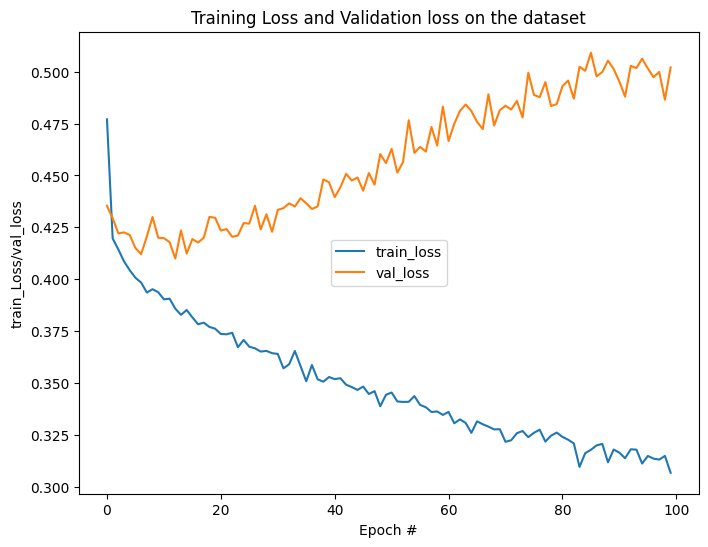

In [77]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.222678, G-Mean=0.829


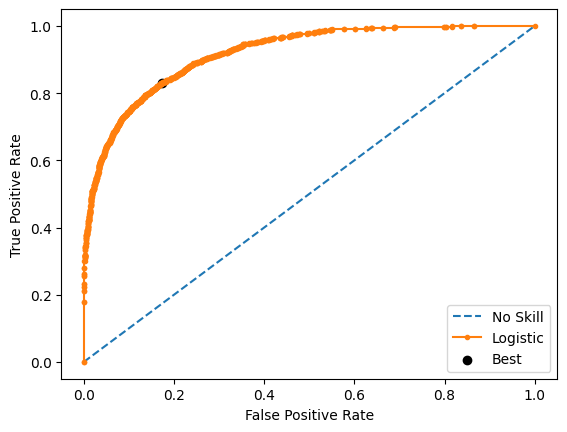

In [78]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [79]:
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)


50/50 [==============================] - 0s 960us/step
[[0.0775748 ]
 [0.01590934]
 [0.00110959]
 ...
 [0.00214414]
 [0.5804248 ]
 [0.27098775]]


In [80]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


**Classification report**

In [81]:
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1274
           1       0.41      0.63      0.50       326

    accuracy                           0.74      1600
   macro avg       0.65      0.70      0.66      1600
weighted avg       0.79      0.74      0.76      1600



**Observations:**

Based on these metrics, the model performs quite well in predicting customers who will not exit but struggles with a higher false positive rate for predicting exits. The model's strength is in its recall for the exited class, indicating its effectiveness in identifying a good portion of actual exits, but this comes at the cost of precision.

**Confusion matrix**

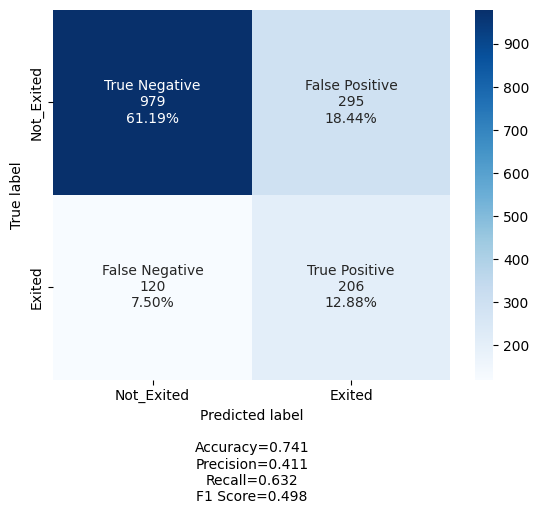

In [82]:
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations:**

* The model is relatively conservative about predicting exits, as evidenced by a moderate number of false positives (18.44%). This means that when the model predicts a customer will exit, it is wrong about 15.94% of the time.
* The model misses a smaller number of actual exits (8.06% false negatives). This lower false negative rate suggests that when a customer does exit, the model is more likely to correctly identify them compared to incorrectly identifying non-exits.

Overall, the model's accuracy is 74.1%, precision is 41.1%, recall is 63.2%, and the F1 score is 49.8%. This indicates that while the model is quite good at identifying customers who will not exit (high true negative rate), it still struggles to balance precision and recall for the exiting customers, as evidenced by the moderate F1 score.

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [83]:
# Initializing SMOTE
sm = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print('After UpSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

After UpSampling, the shape of train_X: (10192, 9)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: xlabel='Exited', ylabel='count'>

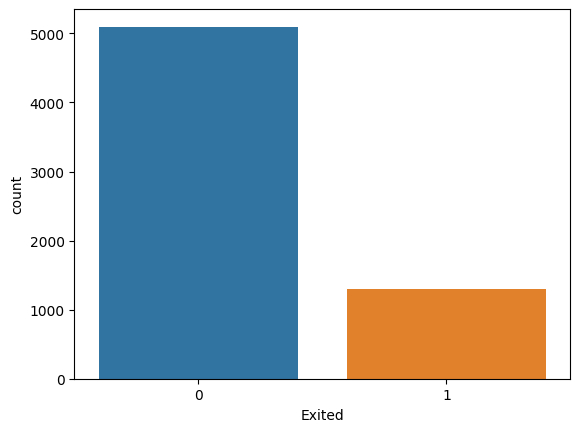

In [88]:
sns.countplot(x=y_train['Exited'])

**Build a model with the balanced dataset**

In [89]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [90]:
model_4 = Sequential()

# Adding the input layer
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform'))

# Adding dropout layer
model_4.add(Dropout(0.2))

# Adding hidden layer
model_4.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

# Adding another dropout layer
model_4.add(Dropout(0.1))

# Adding another dense layer
model_4.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

# Adding the output layer
model_4.add(Dense(1, activation='sigmoid'))

In [91]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable pa

In [92]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

history_4 = model_4.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.4982 - accuracy: 0.7894 - val_loss: 0.4646 - val_accuracy: 0.7969
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7952 - val_loss: 0.4474 - val_accuracy: 0.7969
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7967 - val_loss: 0.4453 - val_accuracy: 0.7969
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7955 - val_loss: 0.4401 - val_accuracy: 0.7969
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8020 - val_loss: 0.4374 - val_accuracy: 0.8006
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7986 - val_loss: 0.4360 - val_accuracy: 0.8044
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8067 - val_loss: 0.4342 - val_accuracy: 0.8144

**Loss function**

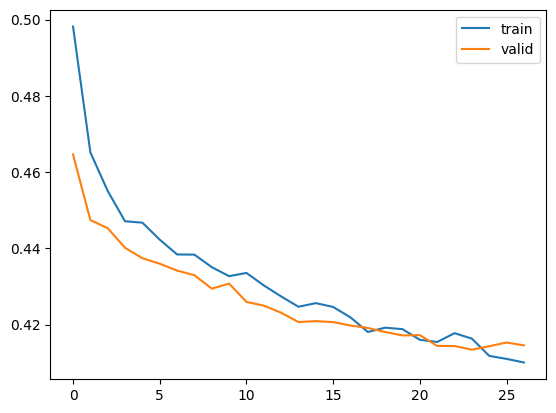

In [93]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

200/200 [==============================] - 0s 1000us/step
Best Threshold=0.209539, G-Mean=0.732


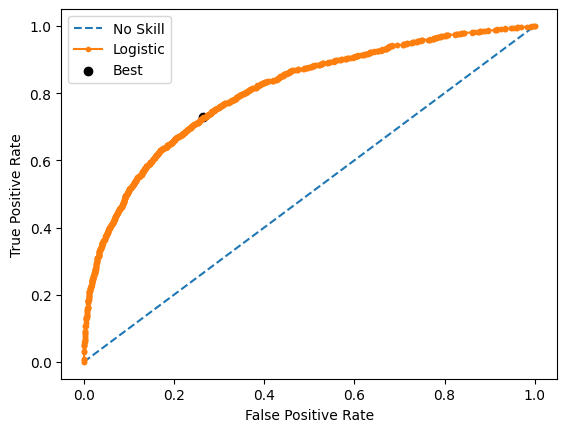

In [94]:
# Predict probabilities on the training set
yhat = model_4.predict(X_train)

# Keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# Calculate ROC curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)

# Calculate the G-Mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))

# Locate the index of the largest G-Mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot the ROC curve for the model
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Show the plot
plt.show()

# Please note that the execution of this code block requires the trained model 'model_4'
# and the training data 'X_train' to be available in the execution environment.


In [95]:
# Predict probabilities on the validation set
y_pred_s = model_4.predict(X_val)

# Apply the tuned threshold to convert probabilities to binary predictions
y_pred_s = (y_pred_s > thresholds[ix])

y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [96]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1274
           1       0.39      0.68      0.50       326

    accuracy                           0.72      1600
   macro avg       0.65      0.70      0.65      1600
weighted avg       0.80      0.72      0.74      1600



**Observations:**

* The model performs better in identifying customers who will not exit (Class 0) but struggles with a significant number of false positives for predicting exits (Class 1). While the recall for Class 1 is higher, indicating the model's capacity to identify most of the positive cases, the precision is low, which means it also misclassifies a lot of non-exits as exits.

* The model's overall accuracy is reasonable but not excellent, and the lower precision for Class 1 could be a concern depending on the cost associated with false positives. For instance, if the cost of falsely targeting customers for retention is high, improving precision for Class 1 should be a priority. To enhance model performance, you might consider:

**Confusion matrix**

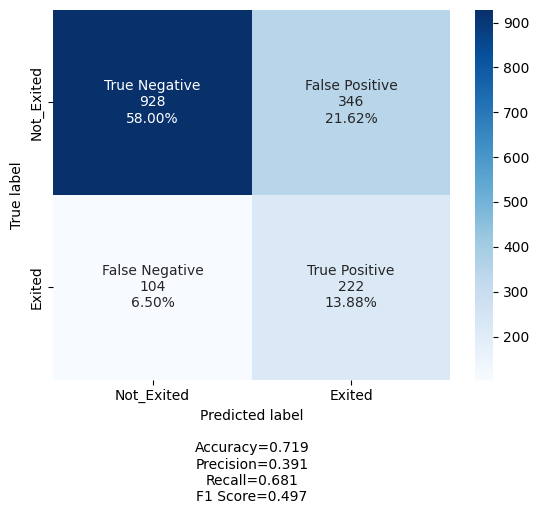

In [97]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations**

The model seems to have a relatively high true positive rate, but at the expense of a high false positive rate. This could be due to the model being more sensitive to predicting exits. While the recall is decent, the precision is quite low, which means there are a substantial number of customers who the model incorrectly predicts will exit.

## Final Model

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.209539, G-Mean=0.732


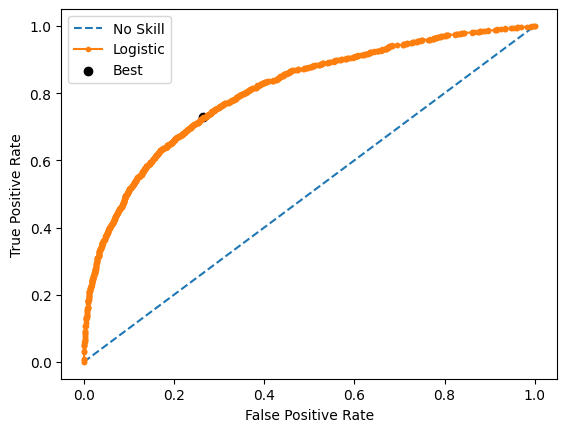

In [107]:
# Assuming model_4 is your best model
yhat = model_4.predict(X_train)

# Keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# Calculate ROC curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)

# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()


In [108]:
# Predict probabilities on the test set using the best model
y_pred_test = model_4.predict(X_test)

# Apply the optimal threshold to get binary predictions
y_pred_test = (y_pred_test > thresholds[ix]).astype(int)

print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


**Classification report**

In [109]:
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



**Observations:**

Overall, the model is more reliable at predicting non-exits than exits. The recall for exits is high, which is positive as it suggests the model can identify the majority of customers who may exit. However, this comes at the cost of precision, leading to a higher number of customers incorrectly labeled as likely to exit.

**Confusion report**

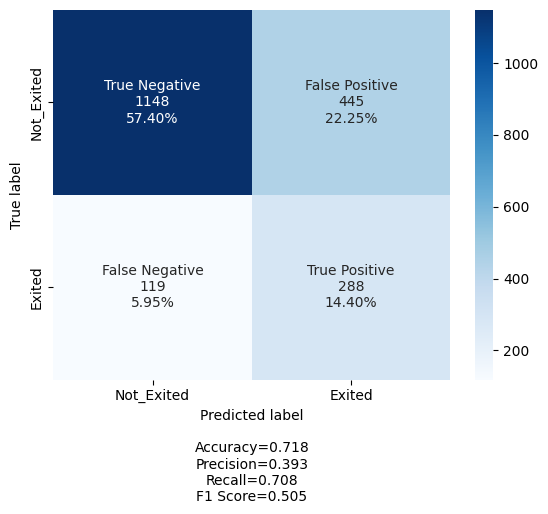

In [110]:
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations:**

The confusion matrix confirms that the model is better at identifying customers who will not exit (high true negative rate) but at the cost of a significant false positive rate. The model has a strong ability to detect actual exits (high recall), which is beneficial for interventions to prevent customer churn. However, the low precision for predicting exits suggests that a considerable number of customers would be incorrectly targeted by retention strategies, which could be costly or inefficient.

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

**Customer Retention Focus:** Given the churn rate of approximately 20%, the bank should prioritize customer retention strategies. Particularly, attention should be given to the demographic that shows a higher propensity to churn, such as older customers as indicated by the data.

**Targeted Engagement:** The data suggests that active members are less likely to churn. The bank should look into ways of increasing customer engagement, possibly through personalized offers, financial advice services, or loyalty programs.

**Regional Strategy Adjustment:** Germany shows a higher churn rate despite having fewer customers compared to France. The bank might need to reevaluate its customer service strategies in Germany or offer more competitive or tailored products to meet the specific needs of the German market.

**Gender-Specific Services:** With a higher churn rate among female customers, consider researching the underlying reasons and possibly developing targeted products or services that cater more specifically to the needs of female customers.

**Credit Card Services:** Since the majority of the customer base has a credit card, and their churn rate is roughly equal to those without, the bank might explore additional credit card features or rewards that can enhance customer satisfaction and retention.

**Product Portfolio Expansion:** A significant number of customers only have one or two products with the bank. Cross-selling and upselling strategies could be enhanced to introduce customers to a wider range of products, potentially increasing their loyalty and reducing churn.

**Financial Health Programs:** For customers with a lower balance, who seem to be more likely to stay, the bank could develop financial health programs that provide advice on saving and investment, which could also be an avenue to introduce other financial products.

**Further Investigation:** The anomalous spike in credit scores at the highest bin warrants further investigation to understand if it's a data entry error or if there's a segment of customers with specific characteristics.

**Customer Feedback and Market Research:** To better understand the driving factors behind churn, especially in high-risk demographics, the bank should consider conducting market research and collecting customer feedback.

**Model Deployment:** The bank's primary focus is to minimize the risk of churn by identifying as many at-risk customers as possible, Model 4 might be preferable despite its lower precision, because it has the highest recall for class 1. It would be particularly useful if the cost of false negatives (not identifying a customer who will churn) is significantly higher than the cost of false positives (wasting resources on a customer who will not churn).

* All models have a relatively high precision for class 0 (non-churned customers), but they also have a high number of false positives for class 1 (churned customers), as shown by the lower precision for class 1.
* The recall for class 1 is consistently above 0.60 across all models, which means they are relatively good at identifying customers who are likely to churn.
* The F1-score for class 1 is considerably lower than for class 0 in all models, suggesting a need for improvement in the balance between precision and recall for the churned customers.

By focusing on these areas, the bank can aim to improve its customer retention rates, enhance customer satisfaction, and solidify its market position across different regions.



___